# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測
- https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.png')
# h, w = img.shape[:2]
# img = cv2.resize(img, (int(h/1.5), int(w/1.5)))

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

In [12]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, ddepth=-1, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
while True:
    # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
    cv2.imshow('Edge Detection', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

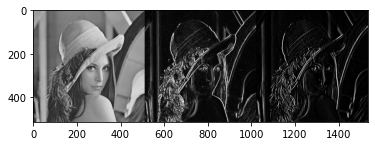

In [13]:
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

### 比較一次與兩次計算偏微分的結果

In [15]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy=0) 
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
while True:
    cv2.imshow('Edge Detection', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

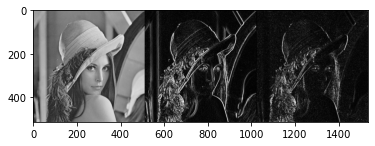

In [16]:
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)